In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.fftpack import fft
from scipy.io import wavfile
import sunau
import librosa
import librosa.display
import pandas
import os
np.set_printoptions(suppress=True)

In [4]:
def saveResults(self, filename, matrix):
    np.save(filename, matrix)
    print ("written successfully..")

def loadResults(self,filename):
    matrix = None
    if (os.path.isfile(filename)):
        matrix = np.load(filename)
    return matrix


In [20]:
class Preprocess:
    def __init__(self, filename, duration=30):
        self.filename = filename
        self.duration = duration
        self.createAudio()
    def createAudio(self):
        self.y, self.sr = librosa.load(self.filename, duration=self.duration)
        print (self.y.shape, self.sr)
    def STFT(self):
        self.stft = librosa.stft(y= self.y)
        return self.stft
    def Spectogram(self):
        stft = self.STFT()
        self.spec, self.spec_phase = librosa.magphase(stft)
        return self.spec, self.spec_phase
    def Centroid(self):
        self.centroid= librosa.feature.spectral_centroid(y= self.y, sr= self.sr)
        return self.centroid
    def SpectralRolloff(self):
        self.rolloff = librosa.feature.spectral_rolloff(y= self.y, sr= self.sr)
        return self.rolloff
    def ZCR(self):
        self.zcr = librosa.feature.zero_crossing_rate(self.y)
        return self.zero_crossing_rate
    def SpectralContrast(self):
        S= np.abs(self.STFT())
        self.contrast = librosa.feature.spectral_contrast(self.sr, S=S)
        return self.contrast
    def MFCC(self):
        
        self.mfcc = librosa.feature.mfcc(y= self.y, sr=self.sr, hop_length=512, n_mfcc=13)
        return self.mfcc
    def RMS(self):
        self.rms= librosa.feature.rmse(y=self.y)
        return self.rms
    def drawRMS(self):
        rms= self.RMS()
        S, phase = self.Spectogram()
        plt.figure()
        plt.subplot(2,1,1)
        plt.semilogy(rms.T, label= 'RMS Energy')
        plt.xticks([])
        plt.xlim([0, rms.shape[-1]])
        plt.legend(loc='best')
        plt.subplot(2,1,2)
        librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
        plt.title('Log power spectrogram')
        plt.tight_layout()
        plt.show()
    

(661500,) 22050
30 (1025, 1292)


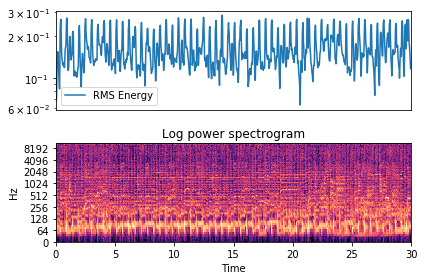

In [23]:
filename = "../genres_data_au/disco/disco.00002.au"
s1 = Preprocess(filename= filename)
s1.STFT()
print (s1.duration, s1.stft.shape)
s1.drawRMS()

In [24]:
f1="../genres_data_au/blues/blues.00002.au"
f2="../genres_data_au/classical/classical.00002.au"
f3="../genres_data_au/country/country.00002.au"

(661500,) 22050
(661500,) 22050
(661500,) 22050


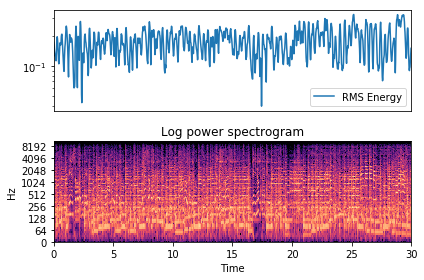

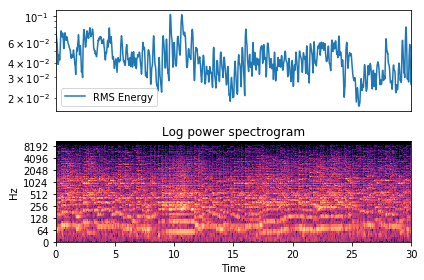

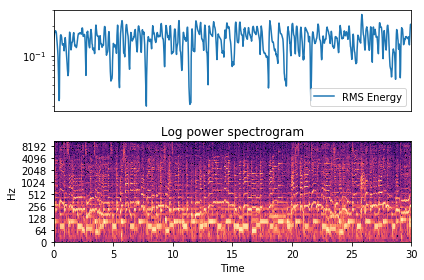

In [25]:
s1= Preprocess(f1)
s2=Preprocess(f2)
s3 = Preprocess(f3)
s1.drawRMS()
s2.drawRMS()
s3.drawRMS()